In [8]:
import sagemaker
my_session = sagemaker.Session()

In [9]:
from sagemaker.predictor import RealTimePredictor, json_deserializer

class ImagePredictor(RealTimePredictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(endpoint_name, sagemaker_session=sagemaker_session, serializer=None, 
                                            deserializer=json_deserializer, content_type='image/jpeg')

In [10]:
endpoint_name = 'sagemaker-fastai-dogscats-2018-10-29-10-26-42-825'
predictor = ImagePredictor(endpoint_name=endpoint_name, sagemaker_session=my_session)

In [11]:
import os, random
from PIL import Image

DOGSCATS_DATA_PATH='data/dogscats/'
TEST_DATA_PATH=f'{DOGSCATS_DATA_PATH}test1/'

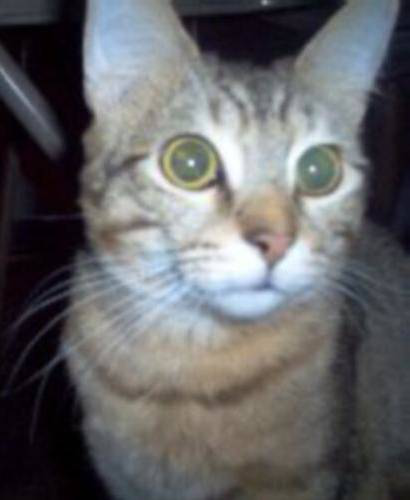

In [12]:
img_file = random.choice(os.listdir(TEST_DATA_PATH)) #change dir name to whatever
img_pil = Image.open(TEST_DATA_PATH+img_file)
img_pil

In [13]:
with open(TEST_DATA_PATH+img_file,'rb') as f:
    # Serializes data and makes a prediction request to the endpoint (local or sagemaker)
    response = predictor.predict(f.read())

print(response)

{'class': 'cats', 'confidence': 0.999862551689148}
